In [1]:
#Revisión de que spacy este instalado
import spacy
print(spacy.__version__)


3.7.2


In [14]:
#Llamamos a las librerias que vamos a necesitar
import spacy
import pathlib
import pandas as pd
from collections import Counter
from spacy import displacy
from spacy.matcher import Matcher
import altair as alt
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import es_core_news_sm



In [ ]:
python -m spacy download es_core_news_sm

In [4]:
# cargar un modelo
nlp = spacy.load("es_core_news_sm")

In [5]:

datos = pd.read_csv('../results/all_amazon_reviews.csv')

In [6]:
print (datos)


           asin         star_rating  \
0    B0CJNQBKX9  5.0 de 5 estrellas   
1    B0CJNQBKX9  5.0 de 5 estrellas   
2    B0C47PZ6HR  4.0 de 5 estrellas   
3    B0C47PZ6HR  4.0 de 5 estrellas   
4    B0C47PZ6HR  5.0 de 5 estrellas   
..          ...                 ...   
375  B0BCMKMMK1           No rating   
376  B0BCMKMMK1           No rating   
377  B0BRBV8L6X  4.0 de 5 estrellas   
378  B0BRBV8L6X  5.0 de 5 estrellas   
379  B0BRBV8L6X  5.0 de 5 estrellas   

                                                 title  \
0                EXCELENTE NITIDEZ Y CALIDAD DE IMAGEN   
1                                   Excelente producto   
2                                       Llegó sin base   
3                                                BUENA   
4                                        Bien producto   
..                                                 ...   
375                                         Be careful   
376  Only network device in my home that won't conn...   
377      

In [10]:
datos['review_text'] = datos['review_text'].fillna('') 

In [11]:
datos['doc'] = datos['review_text'].apply(lambda x: nlp(x) if isinstance(x, str) else '')

In [15]:
displacy.render(doc, style="dep", jupyter=True)


NameError: name 'doc' is not defined

In [16]:
comentarios_por_asin = datos.groupby('asin')['review_text'].apply(lambda x: ' '.join(x)).reset_index()

# Contar el número de comentarios por 'asin'
conteo_por_asin = datos['asin'].value_counts().reset_index()
conteo_por_asin.columns = ['asin', 'conteo']

# Crear una gráfica de barras con Altair
grafica = alt.Chart(conteo_por_asin).mark_bar(
    color='steelblue',  # Color de las barras
    size=30  # Ancho de las barras
).encode(
    x='asin:N',
    y='conteo:Q',
    tooltip=['asin:N', 'conteo:Q']
).properties(
    title='Número de comentarios por ASIN'
)

# Mostrar la gráfica
grafica

alt.Chart(...)

In [ ]:
!pip install wordcloud

ASIN: B0CJNQBKX9
['versatilidad', 'contrastes', 'verdad', 'marca', 'funcional', 'buena', 'calidad', 'excelente', 'relación', 'precio', 'beneficio', 'recomendable', 'dudas', 'Excelente', 'calidad', 'marca', 'verdad', 'marca', 'funcional', 'buana', 'calidad', 'nitidez', 'buena', 'uso', 'cotidiano']
ASIN: B0C47PZ6HR
['pantalla', 'soporte', 'mesa', 'publicacion', 'audifonos', 'Buen', 'producto', 'audífonos', 'verda', 'orden', 'patas', 'control', 'calidad', 'imagen', 'buena', 'expectativas', 'único', 'empaque', 'original', 'pulgadas', 'manual', 'control', 'remoto', 'suelto', 'fin', 'pantalla', 'perfección', 'Buen', 'día', 'producto', 'tele', 'control', 'baterías', 'buen', 'producto', 'aula', 'clases', 'funcionamiento', 'devolví', 'patas', 'pantalla', 'equipo', 'devolví', 'inmediato', 'imagen', 'devolución', 'pantalla', 'reacondicionada', 'garantía', 'control', 'remoto', 'tornillos', 'patitas', 'probe', 'presentación', 'control', 'calidad!Lista', 'perfecto', 'garantizado', 'cierto', 'destapa

ValueError: We need at least 1 word to plot a word cloud, got 0.

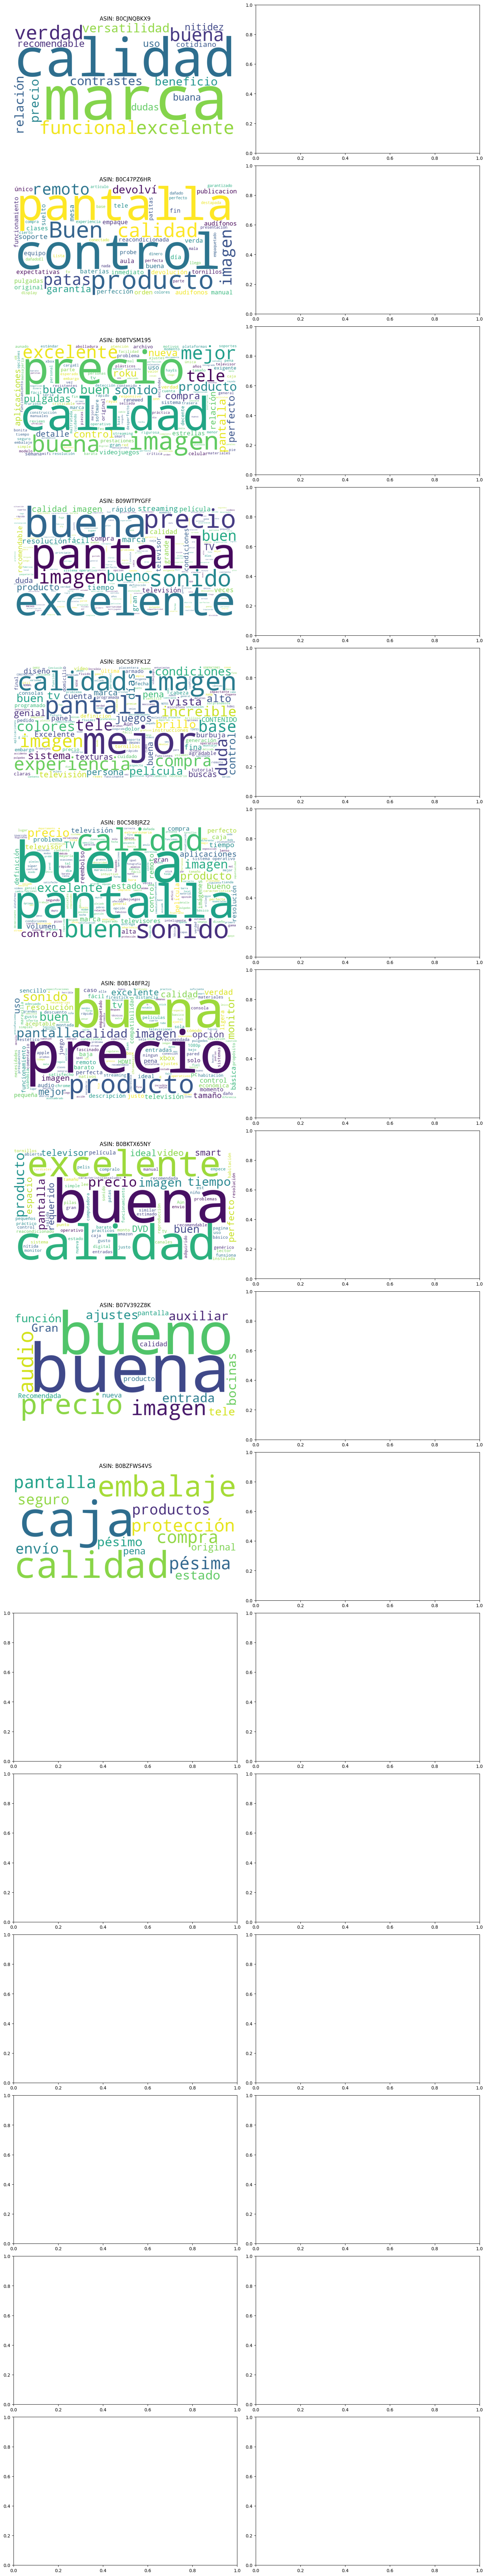

In [17]:


# Procesar los textos con spaCy y agregar los resultados a la columna 'doc'
datos['doc'] = datos['review_text'].apply(lambda x: nlp(x) if isinstance(x, str) else [])

# Crear una función para extraer sustantivos y adjetivos representativos por ASIN
def obtener_sustantivos_adjetivos_representativos(df, asin):
    comentarios = ' '.join(df[df['asin'] == asin]['review_text'])
    doc = nlp(comentarios)
    sustantivos_adjetivos_representativos = [token.text for token in doc if token.pos_ in ('NOUN', 'ADJ')]
    return sustantivos_adjetivos_representativos

# Obtener una lista de ASIN únicos
asin_unicos = datos['asin'].unique()

# Ajustar el diseño y agregar títulos
fig, axs = plt.subplots(len(asin_unicos), 2, figsize=(15, 5 * len(asin_unicos)), constrained_layout=True)

for i, asin in enumerate(asin_unicos):
    sustantivos_adjetivos_representativos = obtener_sustantivos_adjetivos_representativos(datos, asin)

    # Imprimir tokens
    print(f'ASIN: {asin}')
    print(sustantivos_adjetivos_representativos)

    # Crear la nube de palabras
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(sustantivos_adjetivos_representativos))

    # Mostrar la nube de palabras en la posición correspondiente
    axs[i, 0].imshow(wordcloud, interpolation='bilinear')
    axs[i, 0].set_title(f'ASIN: {asin}')
    axs[i, 0].axis('off')

# Ajustar el diseño y agregar título
plt.suptitle('Sustantivos y Adjetivos Representativos por ASIN', fontsize=16)

# Eliminar la segunda columna que está vacía
for ax in axs[:, 1]:
    ax.remove()

# Ajustar el diseño final
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()